# Titanic - machine learning from disaster



In [1]:
from IPython.display import Image
Image(url= "https://image.pbs.org/video-assets/c1noP2x-asset-mezzanine-16x9-jBLtHD7.jpg")

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
train_df = pd.read_csv('train.csv', index_col= 'PassengerId')
test_df = pd.read_csv('test.csv', index_col= 'PassengerId')

### Hiển thị train_df và test_df

In [59]:
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Phân tích train_df

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [62]:
train_df.Survived = train_df.Survived.astype('category')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [63]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [64]:
# cate_ft = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
# for ft in cate_ft:
#     train_df[ft] = train_df[ft].astype('category')
#     test_df[ft] = test_df[ft].astype('category')
# train_df.info()
# test_df.info()

#### Thể hiện tỷ lệ người sống sót

In [65]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


In [66]:
train_df['Sex'].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

#### Trực quan hóa tỷ lệ sống sót/không sống sót qua các thuộc tính khác nhau

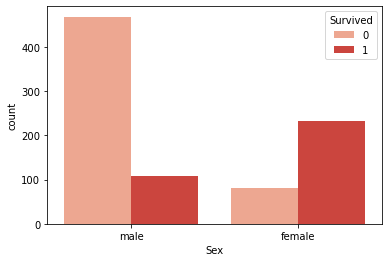

In [67]:
sns.countplot(data = train_df, x = 'Sex', palette= 'Reds', hue = 'Survived');

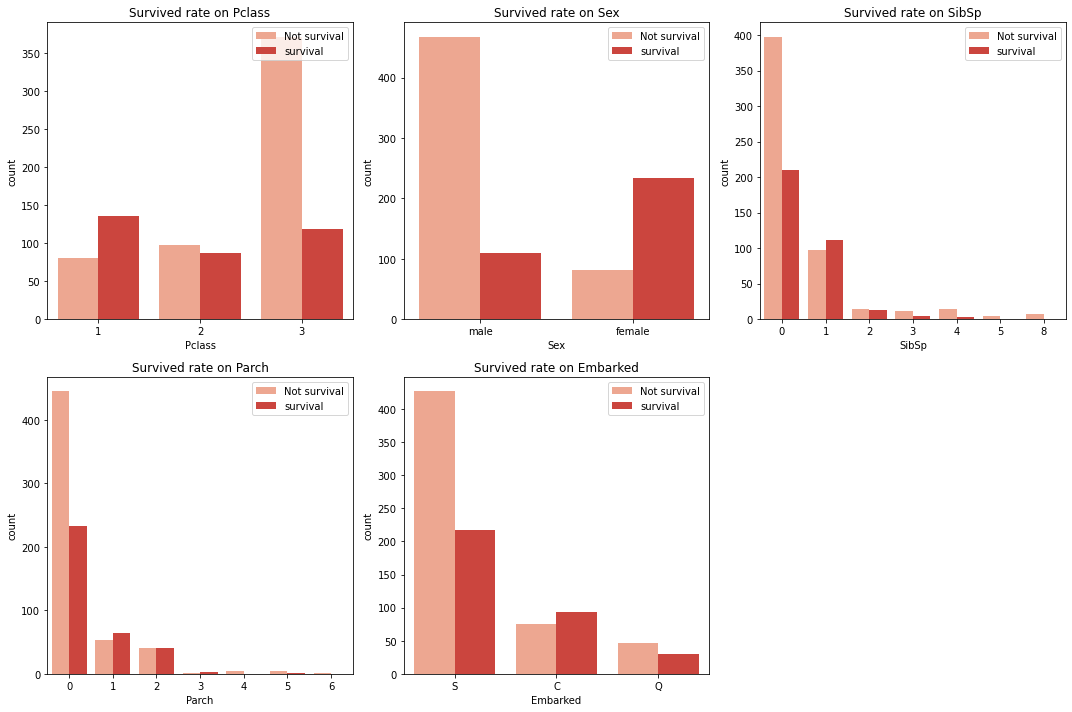

In [68]:
ft = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'] 
fig, ax = plt.subplots(2,3, figsize=(15,10))

for i in range(2):
    for j in range(3):
        k = i*3 + j
        if k < len(ft):
            ax_k = ax[i,j]
            sns.countplot(data = train_df, x = ft[k], palette= 'Reds', hue = 'Survived', ax = ax_k)
            ax_k.set_title('Survived rate on {}'.format(ft[k]))
            ax_k.legend(title = '', loc = 'upper right', labels =['Not survival', 'survival'])
ax.flat[-1].set_visible(False)
plt.tight_layout()

<AxesSubplot:xlabel='Age', ylabel='Count'>

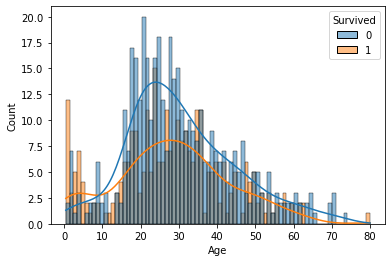

In [69]:
sns.histplot(data= train_df, x = 'Age', hue = 'Survived', bins = 80, kde = True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

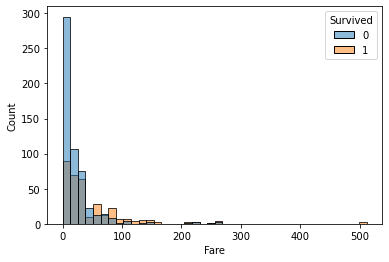

In [70]:
sns.histplot(data= train_df, x = 'Fare', hue = 'Survived', bins = 40)

### Prediction


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [72]:
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
X=train_df[column_train]
Y=train_df['Survived']

In [73]:
print(X['Age'].isnull().sum())
print(X['Pclass'].isnull().sum())
print(X['SibSp'].isnull().sum())
print(X['Parch'].isnull().sum())
print(X['Fare'].isnull().sum())
print(X['Sex'].isnull().sum())
print(X['Embarked'].isnull().sum())

177
0
0
0
0
0
2


Age và Embarked còn giá trị NaN

In [74]:
X['Age']=X['Age'].fillna(X['Age'].median())
print(X['Age'].isnull().sum())

0


C:\Users\Admin\AppData\Local\Temp\ipykernel_4448\2948531423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age']=X['Age'].fillna(X['Age'].median())


In [75]:
X['Embarked'] = train_df['Embarked'].fillna(method ='pad')
print(X['Embarked'].isnull().sum())

0


C:\Users\Admin\AppData\Local\Temp\ipykernel_4448\628289507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked'] = train_df['Embarked'].fillna(method ='pad')


In [82]:
sex ={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:sex[x])
X['Sex'].head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4448\3423667850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex']=X['Sex'].apply(lambda x:sex[x])


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Sex, dtype: int64

In [83]:
embarked={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:embarked[x])
X['Embarked'].head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4448\965334619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Embarked']=X['Embarked'].apply(lambda x:embarked[x])


PassengerId
1    2
2    0
3    2
4    2
5    2
Name: Embarked, dtype: int64

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [85]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 332 to 103
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       712 non-null    float64
 1   Pclass    712 non-null    int64  
 2   SibSp     712 non-null    int64  
 3   Parch     712 non-null    int64  
 4   Fare      712 non-null    float64
 5   Sex       712 non-null    int64  
 6   Embarked  712 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 44.5 KB


In [86]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, Y_train)
Y_pre1 = model1.predict(X_test)

In [93]:
print('Accuracy DecisionTreeClassifier: ', accuracy_score(Y_test, Y_pre1))

Accuracy DecisionTreeClassifier:  0.7821229050279329


In [98]:
from sklearn.neighbors import KNeighborsClassifier
mode2 = KNeighborsClassifier(n_neighbors=5)
mode2.fit(X_train,Y_train)
Y_pre2 = mode2.predict(X_test)

In [99]:
print('Accuracy KNeighborsClassifier: ', accuracy_score(Y_test, Y_pre2))

Accuracy KNeighborsClassifier:  0.7206703910614525


In [100]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train,Y_train)
Y_pre3 = model3.predict(X_test)

In [101]:
print('Accuracy LogisticRegression: ', accuracy_score(Y_test, Y_pre3))

Accuracy LogisticRegression:  0.8100558659217877


#### => Sử dụng LogisticRegression tốt hơn


In [106]:
Run_df = test_df[column_train]
Run_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       332 non-null    float64
 1   Pclass    418 non-null    int64  
 2   SibSp     418 non-null    int64  
 3   Parch     418 non-null    int64  
 4   Fare      417 non-null    float64
 5   Sex       418 non-null    object 
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


In [107]:
Run_df['Age'] = Run_df['Age'].fillna(Run_df['Age'].median())
Run_df['Fare'] = Run_df['Fare'].fillna(Run_df['Fare'].median())

C:\Users\Admin\AppData\Local\Temp\ipykernel_4448\1955052223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Run_df['Age'] = Run_df['Age'].fillna(Run_df['Age'].median())
C:\Users\Admin\AppData\Local\Temp\ipykernel_4448\1955052223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Run_df['Fare'] = Run_df['Fare'].fillna(Run_df['Fare'].median())


In [109]:
sex ={'male':0, 'female':1}
Run_df['Sex']=Run_df['Sex'].apply(lambda x:sex[x])
Run_df['Sex'].head()



C:\Users\Admin\AppData\Local\Temp\ipykernel_4448\4176204452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Run_df['Sex']=Run_df['Sex'].apply(lambda x:sex[x])


PassengerId
892    0
893    1
894    0
895    0
896    1
Name: Sex, dtype: int64

In [110]:
embarked={'C':0, 'Q':1 ,'S':2}
Run_df['Embarked']=Run_df['Embarked'].apply(lambda x:embarked[x])
Run_df['Embarked'].head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4448\2050197310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Run_df['Embarked']=Run_df['Embarked'].apply(lambda x:embarked[x])


PassengerId
892    1
893    2
894    1
895    2
896    2
Name: Embarked, dtype: int64

In [112]:
Predict_result = model3.predict(Run_df)

In [114]:
test_df['Survival'] = Predict_result

In [115]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
